## 베이지안 예시

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 시드 설정 (재현 가능성을 위해)
np.random.seed(42)

# 총 인원수
population_size = 10000

# 사전 확률
P_disease = 0.01  # 병에 걸릴 확률
P_no_disease = 1 - P_disease  # 병에 걸리지 않을 확률

# 조건부 확률
P_positive_given_disease = 0.9  # 병이 있을 때 양성일 확률 (민감도)
P_positive_given_no_disease = 0.1  # 병이 없을 때 양성일 확률 (위양성률)

disease = np.random.choice([1, 0], size=population_size, p=[P_disease, P_no_disease])

In [21]:
# 검사 결과 생성
test_results = np.where(
    disease == 1,
    np.random.choice([1, 0], size=population_size, p=[P_positive_given_disease, 1 - P_positive_given_disease]),
    np.random.choice([1, 0], size=population_size, p=[P_positive_given_no_disease, 1 - P_positive_given_no_disease])
)

# 데이터프레임 생성
data = pd.DataFrame({
    'Disease': disease,
    'Test_Result': test_results
})

data['Disease'].mean()

np.float64(0.0095)

In [12]:
# 양성 판정을 받은 사람들의 데이터 필터링
positive_cases = data[data['Test_Result'] == 1]

# 양성 판정 중 실제로 병에 걸린 비율 계산
prob_disease_given_positive = positive_cases['Disease'].mean()

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_8468\1684104945.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Disease', data=data, palette='viridis')


Text(0, 0.5, 'Count')

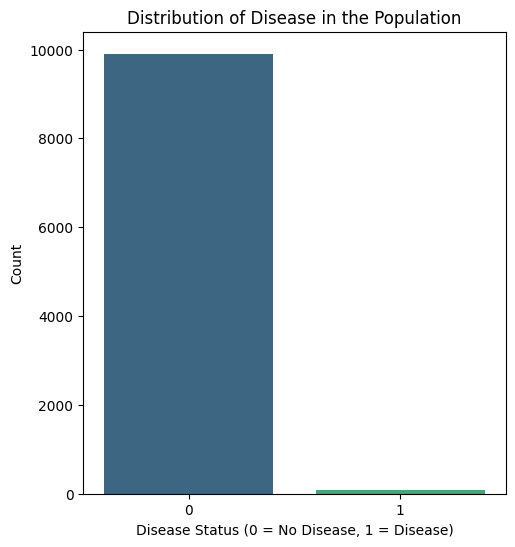

In [13]:
# 시각화
plt.figure(figsize=(12, 6))

# 1. 전체 인구의 병에 걸린 사람과 걸리지 않은 사람의 분포
plt.subplot(1, 2, 1)
sns.countplot(x='Disease', data=data, palette='viridis')
plt.title('Distribution of Disease in the Population')
plt.xlabel('Disease Status (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_8468\2270194119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Disease', data=positive_cases, palette='magma')


Text(0, 0.5, 'Count')

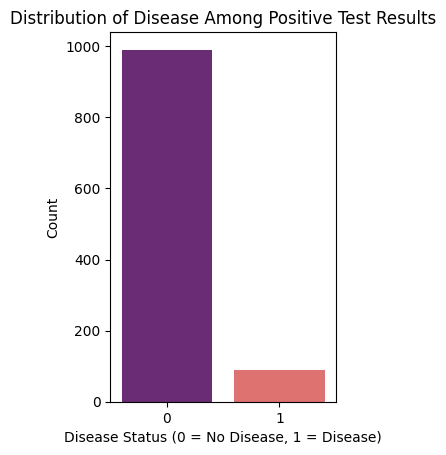

In [14]:
# 2. 양성 판정을 받은 사람 중 실제로 병에 걸린 사람의 비율
plt.subplot(1, 2, 2)
sns.countplot(x='Disease', data=positive_cases, palette='magma')
plt.title('Distribution of Disease Among Positive Test Results')
plt.xlabel('Disease Status (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')

In [15]:
# 결과 출력
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
# 사후 확률 출력
prob_disease_given_positive

np.float64(0.082483781278962)